# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy
from api_keys import api_key

In [2]:
# Creating an empty dataframe with 4 columns
citycountry_df = pd.DataFrame(columns = ["Latitude", "Longitude", "City", "Country"])


# Finding the city and the country code corresponding to the Latitude and Longitude
indx = 0
while citycountry_df.shape[0] < 500:
    lats = np.random.uniform(low=-90.000, high=90.000)
    lngs = np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lats, lngs)
    
    if city.city_name not in citycountry_df['City']:
        citycountry_df.loc[indx, 'Latitude'] = lats
        citycountry_df.loc[indx, 'Longitude'] = lngs
        citycountry_df.loc[indx, "City"] = city.city_name
        citycountry_df.loc[indx, "Country"] = city.country_code
        indx += 1
    
citycountry_df.head()

,Latitude,Longitude,City,Country
0,10.1115,-132.59,atuona,pf
1,26.9834,-61.6196,hamilton,bm
2,45.7649,105.995,mandalgovi,mn
3,-45.1614,86.406,busselton,au
4,55.9801,8.42522,skjern,dk


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q={0}"

In [4]:
citycountry_df['Temp'] = np.nan
citycountry_df['Humidity'] = np.nan
citycountry_df['Wind'] = np.nan
citycountry_df['Clouds'] = np.nan

In [5]:
for i in range(citycountry_df.shape[0]):
    res = requests.get(url.format(citycountry_df.loc[i,'City']))
    print("Found city  " + str(i))
    print("The name of the city is " + citycountry_df.loc[i,'City'])
    if res.status_code == 200:
        info = res.json()
        citycountry_df.loc[i,'Temp'] = info['main']['temp']
        citycountry_df.loc[i,'Humidity'] = info['main']['humidity']
        citycountry_df.loc[i,'Wind'] = info['wind']['speed']
        citycountry_df.loc[i,'Clouds'] = info['clouds']['all']
    else:
        print('City not found')  
    print("_____________________________________________________________________________________")

Found city  0
The name of the city is atuona
_____________________________________________________________________________________
Found city  1
The name of the city is hamilton
_____________________________________________________________________________________
Found city  2
The name of the city is mandalgovi
_____________________________________________________________________________________
Found city  3
The name of the city is busselton
_____________________________________________________________________________________
Found city  4
The name of the city is skjern
_____________________________________________________________________________________
Found city  5
The name of the city is ahipara
_____________________________________________________________________________________
Found city  6
The name of the city is cocorit
_____________________________________________________________________________________
Found city  7
The name of the city is antofagasta
______________________

Found city  61
The name of the city is clyde river
_____________________________________________________________________________________
Found city  62
The name of the city is radviliskis
_____________________________________________________________________________________
Found city  63
The name of the city is qaanaaq
_____________________________________________________________________________________
Found city  64
The name of the city is rikitea
_____________________________________________________________________________________
Found city  65
The name of the city is yerbogachen
_____________________________________________________________________________________
Found city  66
The name of the city is lebu
_____________________________________________________________________________________
Found city  67
The name of the city is svetlogorsk
_____________________________________________________________________________________
Found city  68
The name of the city is hasaki
__________

Found city  121
The name of the city is dikson
_____________________________________________________________________________________
Found city  122
The name of the city is faya
_____________________________________________________________________________________
Found city  123
The name of the city is tasiilaq
_____________________________________________________________________________________
Found city  124
The name of the city is kapaa
_____________________________________________________________________________________
Found city  125
The name of the city is dafeng
_____________________________________________________________________________________
Found city  126
The name of the city is mataura
_____________________________________________________________________________________
Found city  127
The name of the city is namatanai
_____________________________________________________________________________________
Found city  128
The name of the city is mys shmidta
City not found

Found city  182
The name of the city is cernatesti
_____________________________________________________________________________________
Found city  183
The name of the city is hermanus
_____________________________________________________________________________________
Found city  184
The name of the city is hermanus
_____________________________________________________________________________________
Found city  185
The name of the city is ushuaia
_____________________________________________________________________________________
Found city  186
The name of the city is punta arenas
_____________________________________________________________________________________
Found city  187
The name of the city is ushuaia
_____________________________________________________________________________________
Found city  188
The name of the city is beltangadi
_____________________________________________________________________________________
Found city  189
The name of the city is lithakia


Found city  243
The name of the city is moura
_____________________________________________________________________________________
Found city  244
The name of the city is lethem
_____________________________________________________________________________________
Found city  245
The name of the city is kapaa
_____________________________________________________________________________________
Found city  246
The name of the city is punta arenas
_____________________________________________________________________________________
Found city  247
The name of the city is mansa
_____________________________________________________________________________________
Found city  248
The name of the city is jamestown
_____________________________________________________________________________________
Found city  249
The name of the city is rikitea
_____________________________________________________________________________________
Found city  250
The name of the city is neon karlovasion
_____

Found city  304
The name of the city is atuona
_____________________________________________________________________________________
Found city  305
The name of the city is taolanaro
City not found
_____________________________________________________________________________________
Found city  306
The name of the city is inhambane
_____________________________________________________________________________________
Found city  307
The name of the city is jacksonville beach
_____________________________________________________________________________________
Found city  308
The name of the city is carnarvon
_____________________________________________________________________________________
Found city  309
The name of the city is batemans bay
_____________________________________________________________________________________
Found city  310
The name of the city is zambezi
_____________________________________________________________________________________
Found city  311
The name o

Found city  364
The name of the city is jati
_____________________________________________________________________________________
Found city  365
The name of the city is hofn
_____________________________________________________________________________________
Found city  366
The name of the city is rikitea
_____________________________________________________________________________________
Found city  367
The name of the city is bredasdorp
_____________________________________________________________________________________
Found city  368
The name of the city is barrow
_____________________________________________________________________________________
Found city  369
The name of the city is arlit
_____________________________________________________________________________________
Found city  370
The name of the city is rikitea
_____________________________________________________________________________________
Found city  371
The name of the city is cidreira
___________________

Found city  426
The name of the city is sambava
_____________________________________________________________________________________
Found city  427
The name of the city is rikitea
_____________________________________________________________________________________
Found city  428
The name of the city is bluff
_____________________________________________________________________________________
Found city  429
The name of the city is turayf
_____________________________________________________________________________________
Found city  430
The name of the city is mar del plata
_____________________________________________________________________________________
Found city  431
The name of the city is busselton
_____________________________________________________________________________________
Found city  432
The name of the city is alekseyevka
_____________________________________________________________________________________
Found city  433
The name of the city is ushuaia
_____

Found city  487
The name of the city is rostock
_____________________________________________________________________________________
Found city  488
The name of the city is hermanus
_____________________________________________________________________________________
Found city  489
The name of the city is vaini
_____________________________________________________________________________________
Found city  490
The name of the city is tuktoyaktuk
_____________________________________________________________________________________
Found city  491
The name of the city is mar del plata
_____________________________________________________________________________________
Found city  492
The name of the city is rikitea
_____________________________________________________________________________________
Found city  493
The name of the city is ushuaia
_____________________________________________________________________________________
Found city  494
The name of the city is atuona
______

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
citycountry_df

,Latitude,Longitude,City,Country,Temp,Humidity,Wind,Clouds
0,10.1115,-132.59,atuona,pf,82.26,99.0,14.45,76.0
1,26.9834,-61.6196,hamilton,bm,41.88,86.0,8.05,75.0
2,45.7649,105.995,mandalgovi,mn,32.40,70.0,8.19,32.0
3,-45.1614,86.406,busselton,au,60.64,40.0,17.81,0.0
4,55.9801,8.42522,skjern,dk,62.87,45.0,6.93,24.0
5,-35.5299,166.053,ahipara,nz,58.86,95.0,11.99,88.0
6,27.9678,-109.314,cocorit,mx,55.90,70.0,3.38,0.0
7,-23.7886,-69.5146,antofagasta,cl,60.80,82.0,4.70,75.0
8,6.20904,72.3186,kulhudhuffushi,mv,85.69,100.0,3.71,0.0
9,57.0052,-153.039,kodiak,us,56.43,100.0,11.41,90.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
citycountry_df['Latitude'] = citycountry_df['Latitude'].astype(float)
citycountry_df['Longitude'] = citycountry_df['Longitude'].astype(float)

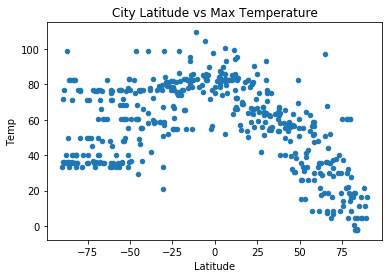

In [8]:
citycountry_df.plot.scatter(x='Latitude', y='Temp')
plt.title("City Latitude vs Max Temperature")
plt.savefig('output_data/lat_temp.png')

#### Latitude vs. Humidity Plot

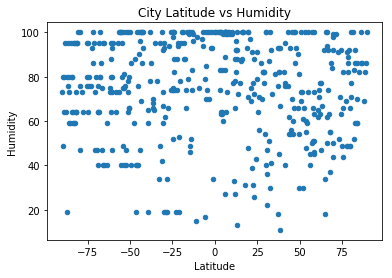

In [9]:
citycountry_df.plot.scatter(x='Latitude', y='Humidity')
plt.title("City Latitude vs Humidity")
plt.savefig('output_data/lat_humidity.png')

#### Latitude vs. Cloudiness Plot

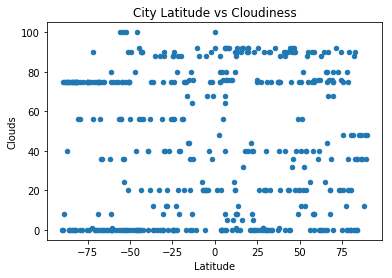

In [10]:
citycountry_df.plot.scatter(x='Latitude', y='Clouds')
plt.title("City Latitude vs Cloudiness")
plt.savefig('output_data/lat_clouds.png')

#### Latitude vs. Wind Speed Plot

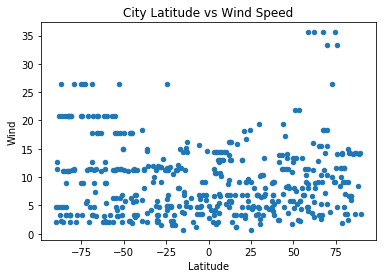

In [11]:
citycountry_df.plot.scatter(x='Latitude', y='Wind')
plt.title("City Latitude vs Wind Speed")
plt.savefig('output_data/lat_wind.png')

In [12]:
citycountry_df.to_csv(output_data_file, index=False)

NameError: name 'output_data_file' is not defined

In [ ]:
os.listdir('./output_data')